In [2]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
corr_matrix = data.corr()

print(corr_matrix)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [6]:
salary_corr = corr_matrix['Salary']

print(salary_corr)

YearsExperience    0.978242
Salary             1.000000
Name: Salary, dtype: float64


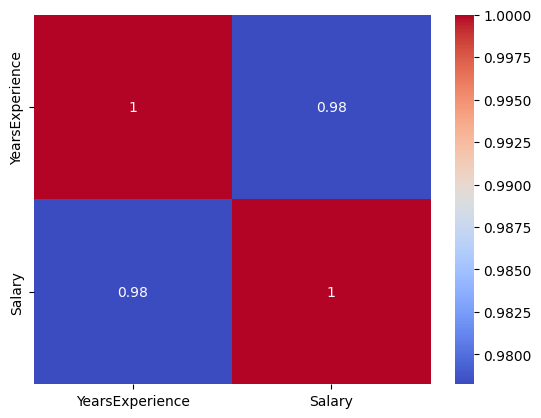

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.show()


 Regression equation for YearsExperience: 
Salary =  25792.20019866871  +  9449.962321455074 * YearsExperience

 R-squared for YearsExperience: 0.9569566641435086


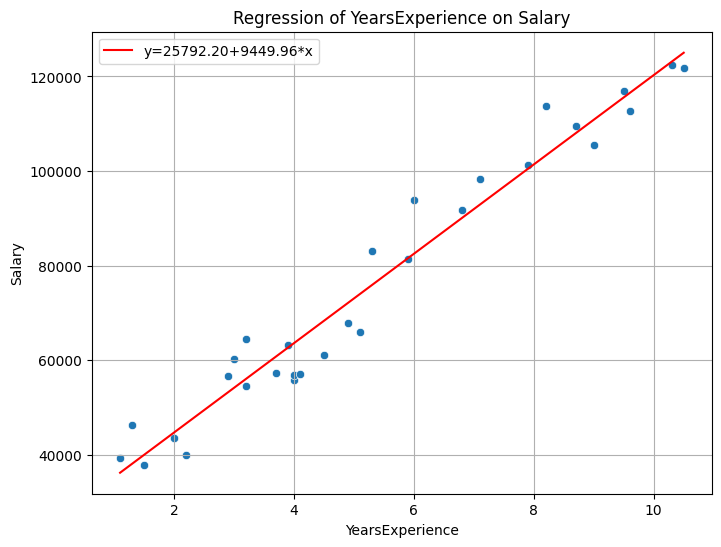

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

variables= ['YearsExperience']

for var in variables:
    X = data[[var]]
    Y = data['Salary']
    
    # Gets the equation of the regression
    model = LinearRegression().fit(X,Y)
    # providing the points for plotting the line
    predictions = model.predict(X)
    
    #Plot the scatterplot
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x=var, y = 'Salary')
    
    #Add the line
    line = model.intercept_ + model.coef_[0]* data[var]
    plt.plot(data[var], line, 'r', label=f'y={model.intercept_:.2f}+{model.coef_[0]:.2f}*x')
    
    print(f'\n Regression equation for {var}: ')
    print('Salary = ', model.intercept_, ' + ', model.coef_[0],"*", var)
    print(f'\n R-squared for {var}: {r2_score(Y, predictions)}')
    
    plt.legend()
    plt.title(f'Regression of {var} on Salary')
    plt.grid(True)
    plt.show()
    
    